In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

#path to datasets
test_sets = '/content/drive/MyDrive/BigCatsDatasets/test'
train_sets = '/content/drive/MyDrive/BigCatsDatasets/train'
valid_sets = '/content/drive/MyDrive/BigCatsDatasets/valid'

#ukuran gambar
img_width, img_height = 224, 224
#batch size
batch_size = 32

#data augmentasi, seperti merubah posisi, warna, zoom, dll
train_datagen = ImageDataGenerator(
    rescale=1./255            # Rescale gambar menjadi karena nilai rgb dari 1-255
    # rotation_range=20,      # Rotate gambar secara random (by degrees)
    # zoom_range=0.2,         # Randomly zoom image
    # horizontal_flip=True,   # Randomly flip the image horizontally
                                   )

# buat data generator untuk train, valid, dan test
train_generator = train_datagen.flow_from_directory(
    train_sets,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory(
    valid_sets,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_sets,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Set to False for confusion matrix
)

Found 2339 images belonging to 10 classes.
Found 50 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [ ]:
# bangun model, menggunakan convolutional layer.
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Compile model, backpropagation, loss, dan optimisasi
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=2,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size
)


Epoch 1/2
73/73 [==============================] - 471s 6s/step - loss: 2.2323 - accuracy: 0.2128 - val_loss: 1.8894 - val_accuracy: 0.3125
Epoch 2/2
73/73 [==============================] - 348s 5s/step - loss: 1.6589 - accuracy: 0.3966 - val_loss: 1.3662 - val_accuracy: 0.5938


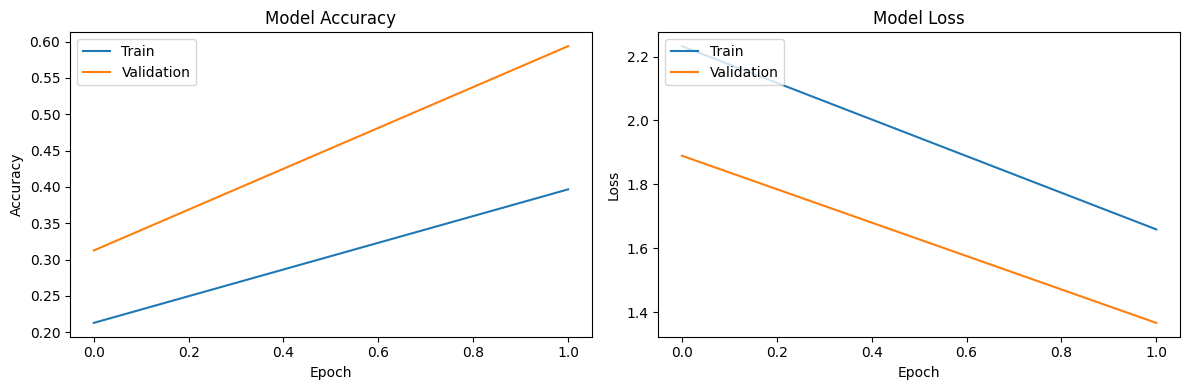

In [ ]:
# buat plot
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# evaluasi model berdasarkan test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test accuracy: {test_acc}')

# Save model
model.save('big_cats_classifier.h5')


1/1 [==============================] - 2s 2s/step - loss: 1.4860 - accuracy: 0.4062
Test accuracy: 0.40625


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 122ms/step


Text(0.5, 1.0, 'Prediction: CARACAL')

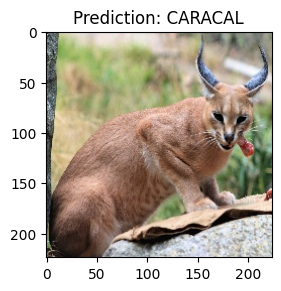

In [ ]:
from tensorflow.keras.models import load_model

# Load saved model
# loaded_model = load_model('big_cats_classifier.h5')
loaded_model = load_model('/content/drive/MyDrive/BigCatsDatasets/TrainedModel/trained_model.h5')

# Load Image yang ingin di test
image_path = '/content/drive/MyDrive/BigCatsDatasets/test/CARACAL/3.jpg'
img = image.load_img(image_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension for batch

# Normaliasi gambar
img_array /= 255.0

# Buat prediksi berdasarkan model yang sudah di train
predictions = loaded_model.predict(img_array)

# Ambil kelas dengan highest probability
predicted_class = np.argmax(predictions)

# Ambil labels dari generator
class_labels = list(train_generator.class_indices.keys())

# Print
plt.subplot(1, 2, 1)
plt.imshow(image.load_img(image_path))
plt.title(f'Prediction: {class_labels[predicted_class]}')

